<a href="https://colab.research.google.com/github/dinsor17/KKU_Data_mining/blob/master/KMeans_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=6)

In [3]:
X.shape #300แถว 2หลัก

(300, 2)

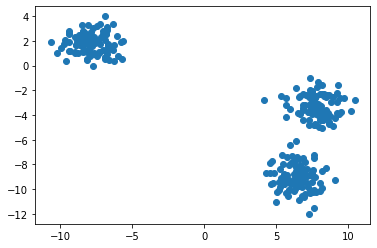

In [4]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

##Import

In [5]:
from sklearn.cluster import KMeans

##Define

In [6]:
KMclust = KMeans(n_clusters=5)

##Train

In [7]:
KMclust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##Predict

In [8]:
label = KMclust.predict(X)

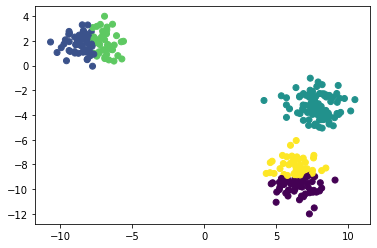

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=label)

##Color quantization (application of kmea)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/DWDM_material'

Mounted at /content/drive


In [11]:
import cv2
import os

In [12]:
img = cv2.imread(os.path.join(path,'98be141fff52759150148421e0dc11a2.jpg'))
img

array([[[ 24,  29,  30],
        [ 24,  29,  30],
        [ 24,  29,  30],
        ...,
        [ 82,  77,  79],
        [ 81,  76,  78],
        [ 81,  76,  78]],

       [[ 24,  29,  30],
        [ 24,  29,  30],
        [ 24,  29,  30],
        ...,
        [ 82,  77,  79],
        [ 81,  76,  78],
        [ 81,  76,  78]],

       [[ 24,  29,  30],
        [ 24,  29,  30],
        [ 24,  29,  30],
        ...,
        [ 82,  77,  79],
        [ 81,  76,  78],
        [ 81,  76,  78]],

       ...,

       [[ 52,  91, 136],
        [ 53,  92, 137],
        [ 53,  92, 137],
        ...,
        [ 31,  34,  38],
        [ 31,  34,  38],
        [ 38,  41,  45]],

       [[ 52,  91, 136],
        [ 53,  92, 137],
        [ 53,  92, 137],
        ...,
        [ 30,  33,  37],
        [ 29,  32,  36],
        [ 36,  39,  43]],

       [[ 52,  91, 136],
        [ 53,  92, 137],
        [ 53,  92, 137],
        ...,
        [ 29,  32,  36],
        [ 28,  31,  35],
        [ 35,  38,  42]]

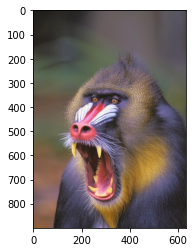

In [13]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [14]:
RGB_img.shape

(900, 632, 3)

##count unique colors

In [15]:
import numpy as np

In [16]:
np.unique(np.reshape(RGB_img,(900*632,3)),axis=0).shape

(98591, 3)

##Use K-mean to reduce color from 256 color to 8 colors

In [17]:
#Define
myQuantize = KMeans(n_clusters=8)

In [18]:
img_row = np.reshape(RGB_img,(900*632, 3))
img_row

array([[30, 29, 24],
       [30, 29, 24],
       [30, 29, 24],
       ...,
       [36, 32, 29],
       [35, 31, 28],
       [42, 38, 35]], dtype=uint8)

In [19]:
img_row.shape

(568800, 3)

In [20]:
#Tranin
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
#Predict
res = myQuantize.predict(img_row)
res

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

##Get cluster centers

In [22]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[134.72139646,  95.38048991,  67.60080639],
       [ 47.8512998 ,  43.23928605,  43.47667656],
       [229.29469194, 213.94379147, 225.22767773],
       [ 98.98200619,  94.45148724,  90.83351907],
       [130.96462984, 111.27188756, 123.02403646],
       [181.09288215, 126.88483081,  81.02932711],
       [ 73.14480097,  69.48747969,  77.33756093],
       [197.88816167, 155.59585869, 153.27959582]])

In [23]:
Clus_cen.shape

(8, 3)

##Map color name back to image

In [24]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
    new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [25]:
new_img_= new_img/255

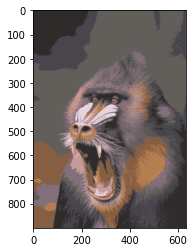

In [26]:
plt.imshow(new_img_)